In [1]:
# مكتبة  توفر دعمًا للعمليات الرياضية والعلمية على البيانات تتيح  إنشاء وتلاعب وتحليل البيانات 
import numpy as np # linear algebra

#مكتبة توفر واجهة عالية المستوى لتحليل وتنظيم البيانات  الذي يسمح بتخزين وتنظيم البيانات
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# مكتبات توفر واجهة لرسم الرسوم البيانية ثنائية وثلاثية
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from matplotlib.patches import Circle


In [2]:
# قراءة البيانات من ملف CSV
df = pd.read_csv("Mall_customers_1.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#يتم تحديد الأعمدة التي ترغب في إعادة تسميتها
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendScore'}, inplace=True)


In [6]:
df.head()

,CustomerID,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# بتحديد الميزات التي ترغب في استخدامها في تجميع البيانات
x = df.iloc[:, [3, 4]].values

In [8]:
#لمعرفه ابعاد المصفوفه
x.shape

(200, 2)

In [9]:
# تطبيق خوارزمية DBSCAN مع قيم eps و min_samples المعدلة
db = DBSCAN(eps=5, min_samples=6, metric='euclidean')
#يتم تدريب النموذج DBSCAN على بيانات "x". الخوارزمية ستقوم بتجميع البيانات في كتل مستندة إلى الكثافة والمسافة بين النقاط.
labels = db.fit_predict(x)



In [10]:
# حساب عدد المجموعات
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters:', n_clusters)
#يتم الحصول على تسميات التجميع (cluster labels) لكل نقطة في البيانات التي تم تجميعها باستخدام النموذج DBSCAN.
# مخرجات التدريب


Number of clusters: 4


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

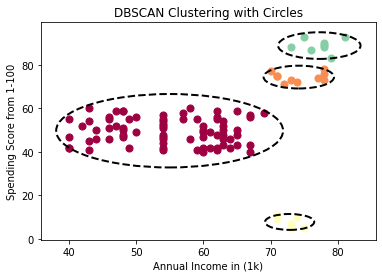

In [12]:
# رسم البيانات المتجمعة والدوائر
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # تمثيل مجموعة الضوضاء باللون الأسود
        col = 'k'
    else:
        # استخراج النقاط التي تنتمي إلى التجمع k
        class_member_mask = (labels == k)
        xy = x[class_member_mask]

        # رسم النقاط باستخدام اللون المحدد
        plt.scatter(xy[:, 0], xy[:, 1], c=col, s=50)

        # حساب مركز التجمع
        center_x = np.mean(xy[:, 0])
        center_y = np.mean(xy[:, 1])

        # حساب نصف قطر الدائرة
        radius = np.max(np.linalg.norm(xy - np.array([[center_x, center_y]]), axis=1))

        # رسم الدائرة حول التجمع
        circle = Circle((center_x, center_y), radius, edgecolor='black', facecolor='none', linestyle='--', linewidth=2)
        plt.gca().add_patch(circle)

plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('DBSCAN Clustering with Circles')
plt.show()